<a href="https://colab.research.google.com/github/pmdino/CS39AA-Project/blob/main/CS39AA_Project_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to create a NLP model to detect unreliable news articles from the title, author, and full text. In the dataset, entries are labeled with 0 as reliable and 1 as unreliable.

In [ ]:
!mkdir mydata
!cp -r /content/drive/MyDrive/data/trainnews.csv /content/mydata

mkdir: cannot create directory ‘mydata’: File exists


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

news_data = pd.read_csv("./mydata/trainnews.csv")
news_data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
news_data.shape

(20800, 5)

In [ ]:
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
news_data = news_data.fillna('')

news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
news_data['word_count'] = news_data['text'].apply(lambda x: len(str(x).split()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9a519cc90>]],
      dtype=object)

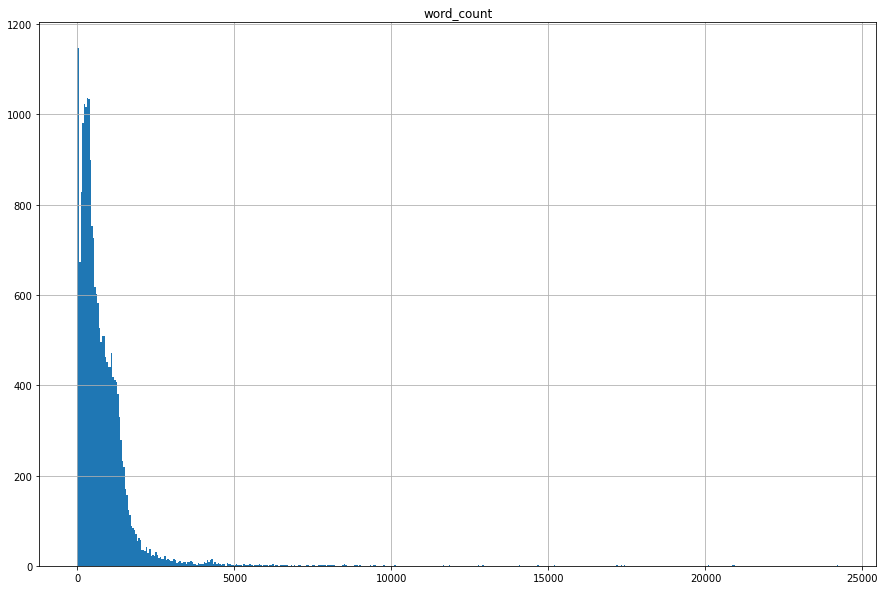

In [ ]:
news_data[['word_count']].hist(bins=500, figsize=(15, 10))

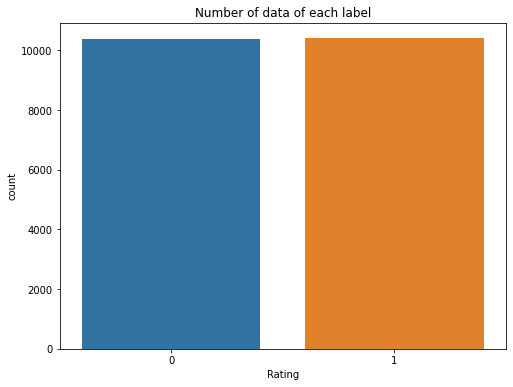

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=news_data)
plt.xlabel("Rating")
plt.title("Number of data of each label")
plt.show()

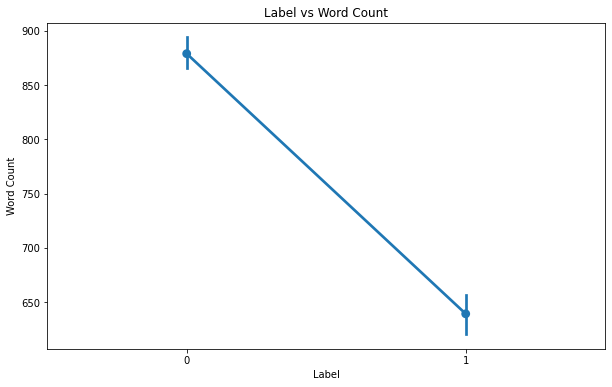

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "label", y = "word_count", data = news_data)
plt.xlabel("Label")
plt.ylabel("Word Count")
plt.title("Label vs Word Count")
plt.show()